# PCA & Dimensionality Reduction 


## 1. Load  Dataset
We use the famous Iris dataset with 4 features.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2. Standardizing Features
PCA needs scaled data for accurate variance measurement.

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## 3. Applying PCA
We reduce 4 features → 2 components.

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

## 4. Explained Variance
Shows how much information each component keeps.

In [4]:
explained = pca.explained_variance_ratio_
explained

array([0.72962445, 0.22850762])

## 5. Cumulative Explained Variance Plot

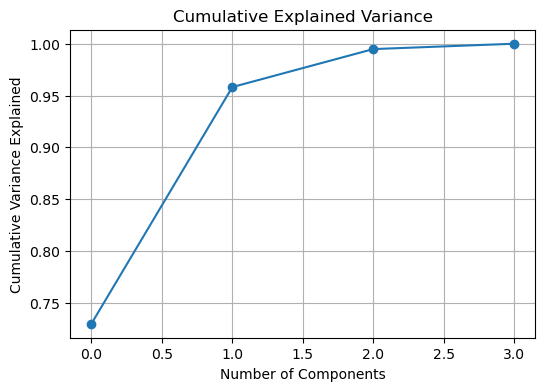

In [5]:
import matplotlib.pyplot as plt

pca_all = PCA().fit(X_scaled)
cum_var = pca_all.explained_variance_ratio_.cumsum()

plt.figure(figsize=(6,4))
plt.plot(cum_var, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid()
plt.show()

## 6. PCA 2D Visualization

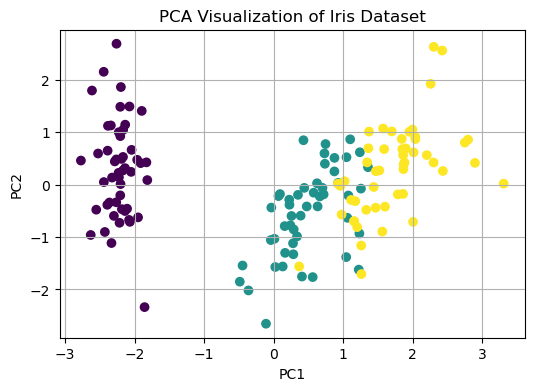

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization of Iris Dataset")
plt.grid()
plt.show()

## 7. Before vs After PCA – Model Comparison

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split original data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
pred_orig = model.predict(X_test)
acc_orig = accuracy_score(y_test, pred_orig)

# PCA-transformed data
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model_pca = LogisticRegression(max_iter=200)
model_pca.fit(X_train_pca, y_train)
pred_pca = model_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, pred_pca)

acc_orig, acc_pca

(1.0, 0.9111111111111111)